# AG News Classification - NLP Project

## Project Overview
This notebook implements a text classification model on the AG News dataset, which contains news articles categorized into 4 classes:
- World
- Sports
- Business
- Sci/Tech

**Goal:** Build and train an NLP model to classify news articles into their respective categories.

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For text processing
import re
import string
from collections import Counter

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep Learning (optional - for advanced models)
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import Dataset, DataLoader
    print("PyTorch is available")
except:
    print("PyTorch not available, will use sklearn models")

print("All libraries imported successfully!")

PyTorch is available
All libraries imported successfully!


## Step 2: Load and Explore the AG News Dataset

In [2]:
# Load the train and test data - direct path
train_df = pd.read_csv('/kaggle/input/datasets/bishaluts/ag-news-dataset/train.csv')
test_df = pd.read_csv('/kaggle/input/datasets/bishaluts/ag-news-dataset/test.csv')

print("Data loaded successfully!")

# Add column names
train_df.columns = ['Class', 'Title', 'Description']
test_df.columns = ['Class', 'Title', 'Description']

# Display basic information
print("Training Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nFirst few rows of training data:")
print(train_df.head())

print("\nClass Distribution:")
print(train_df['Class'].value_counts().sort_index())

# Map class numbers to names
class_mapping = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
train_df['Class_Name'] = train_df['Class'].map(class_mapping)
test_df['Class_Name'] = test_df['Class'].map(class_mapping)

print("\nClass Names:")
print(train_df['Class_Name'].value_counts())

Data loaded successfully!
Training Data Shape: (120000, 3)
Test Data Shape: (7600, 3)

First few rows of training data:
   Class                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  

Class Distribution:
Class
1    30000
2    30000
3    30000
4    30000
Name: count, dtype: int64

Class Names:
Class_Name
Business    30000
Sci/Tech    30000
Sports      3

In [3]:
# Combine Title and Description into a single text column
train_df['Text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['Text'] = test_df['Title'] + ' ' + test_df['Description']

# Basic text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

# Apply cleaning
train_df['Clean_Text'] = train_df['Text'].apply(clean_text)
test_df['Clean_Text'] = test_df['Text'].apply(clean_text)

print("Sample cleaned text:")
print(train_df['Clean_Text'].iloc[0])

# Prepare X and y for training
X_train = train_df['Clean_Text']
y_train = train_df['Class'] - 1  # Convert to 0-indexed
X_test = test_df['Clean_Text']
y_test = test_df['Class'] - 1

print(f"\nTraining samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Sample cleaned text:
wall st bears claw back into the black reuters reuters shortsellers wall streets dwindlingband of ultracynics are seeing green again

Training samples: 120000
Test samples: 7600


In [4]:
# TF-IDF Vectorization
print("Training TF-IDF Vectorizer...")
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")

# Model 1: Logistic Regression
print("\n=== Training Logistic Regression ===")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

# Model 2: Multinomial Naive Bayes
print("\n=== Training Multinomial Naive Bayes ===")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_test_tfidf)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")

# Compare models
print("\n=== Model Comparison ===")
print(f"Logistic Regression: {acc_lr:.4f}")
print(f"Naive Bayes: {acc_nb:.4f}")

Training TF-IDF Vectorizer...
TF-IDF feature shape: (120000, 10000)

=== Training Logistic Regression ===
Logistic Regression Accuracy: 0.9078

=== Training Multinomial Naive Bayes ===
Naive Bayes Accuracy: 0.8859

=== Model Comparison ===
Logistic Regression: 0.9078
Naive Bayes: 0.8859


=== Classification Report (Logistic Regression) ===
              precision    recall  f1-score   support

       World       0.93      0.90      0.91      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.88      0.88      0.88      1900
    Sci/Tech       0.88      0.88      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



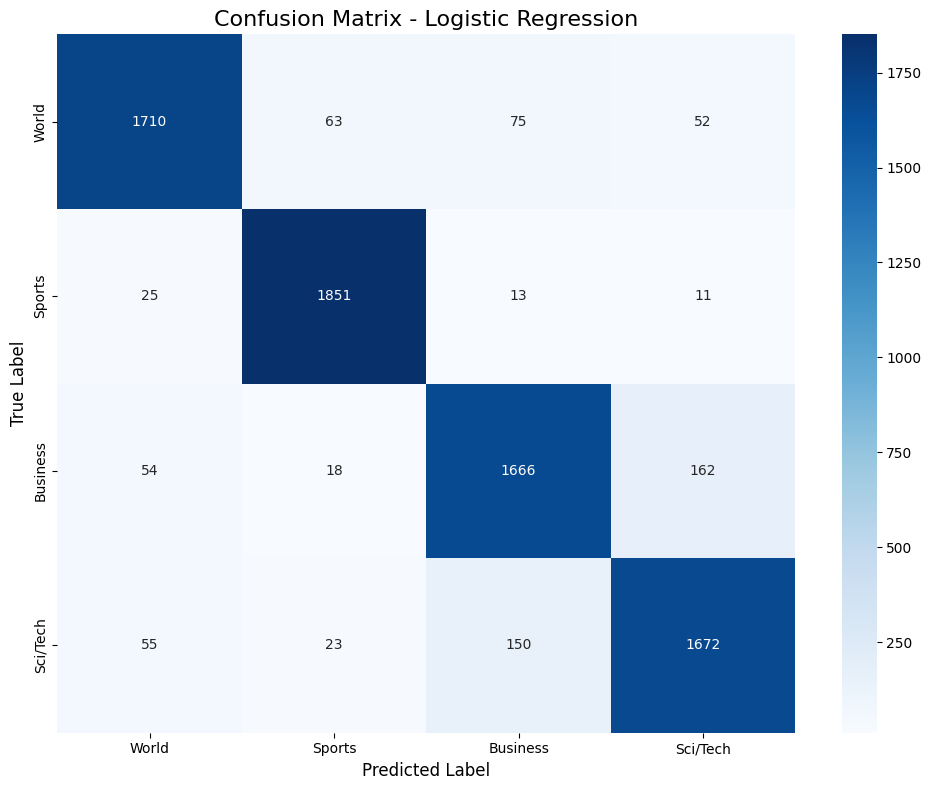


=== Sample Predictions ===

Text: fears for t n pension after talks unions representing workers at turner newall say they are disappoi...
True Label: Business
Predicted: Business

Text: the race is on second private team sets launch date for human spaceflight spacecom spacecom toronto ...
True Label: Sci/Tech
Predicted: Sci/Tech

Text: ky company wins grant to study peptides ap ap a company founded by a chemistry researcher at the uni...
True Label: Sci/Tech
Predicted: Sci/Tech


In [5]:
# Use the best model (Logistic Regression) for detailed evaluation
class_names = ['World', 'Sports', 'Business', 'Sci/Tech']

# Classification Report
print("=== Classification Report (Logistic Regression) ===")
print(classification_report(y_test, y_pred_lr, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Sample predictions
print("\n=== Sample Predictions ===")
for i in range(3):
    print(f"\nText: {test_df['Clean_Text'].iloc[i][:100]}...")
    print(f"True Label: {class_names[y_test.iloc[i]]}")
    print(f"Predicted: {class_names[y_pred_lr[i]]}")